In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [59]:
data = pd.read_excel('ClusteringData.xlsx',Sheet1=0)

In [60]:
def scale_df(data,cols):
    data_scaler = MinMaxScaler(feature_range=(0,1))
    scaling_cols = cols
    data_scaled = data[scaling_cols]
    data_scaled = data_scaler.fit_transform(data_scaled)
    data_scaled = pd.DataFrame(data_scaled,columns = scaling_cols)
    data = data.drop(scaling_cols,axis=1)
    data[scaling_cols] = data_scaled
    return data

In [61]:
cols = ['Customer Lifetime Value', 'CLTV growth YoY %', 'Credit Rating',
       'Overdue frequency(in 12months)',
       'Outstanding Amount(in 12 months in 1000s)',
       'Average Purchase Value(in 1000s)', 'Likelihood of churn']
data2 = scale_df(data,cols)

C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [63]:
#data2

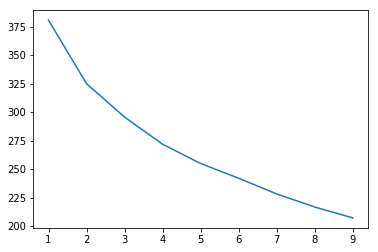

In [65]:
wcss =[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data2) 
    wcss.append(kmeans.inertia_)
   
plt.plot(range(1,10),wcss)
plt.show()

In [66]:
cluster = KMeans(n_clusters=3,random_state=0)

data['cluster'] = cluster.fit_predict(data2)
y_means = cluster.fit_predict(data)
#worth.head(20)

In [36]:
#centroid=cluster.cluster_centers_
#print(cluster.cluster_centers_)  
#cluster.cluster_centers_.shape

In [68]:
print(data.cluster.value_counts())
data.to_csv('01-clustered.csv',index=False)

1    273
2    214
0    214
Name: cluster, dtype: int64


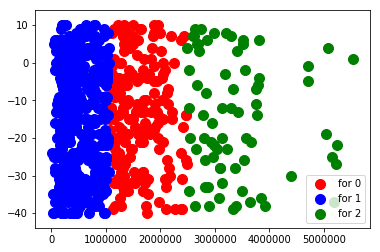

In [69]:
plt.scatter(data.iloc[y_means==0,0],data.iloc[y_means==0,1], s=100, c='red', label='for 0')
plt.scatter(data.iloc[y_means==1,0],data.iloc[y_means==1,1], s=100, c='blue',label='for 1')
plt.scatter(data.iloc[y_means==2,0],data.iloc[y_means==2,1], s=100, c='green', label='for 2')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='yellow',label='Centroids')
plt.legend()
plt.show()